# General Performance Evaluation

VCF files collected from students were benchmarked against a high-confidence variant list provided by the SEQC2 consortium. Performance metrics, including precision, recall, and F1-score, were used for evaluation. The following figures illustrate the distribution of these performance metrics across 12 different pipelines.

In [24]:
%load_ext autoreload
%autoreload 2

from utils import *
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
DIRECTORY = os.getcwd()

In [26]:
all_vcfs ={}

pipelines = ["mutect_yb_bwa", 
             "mutect_yb_bowtie", 
             "mutect_nb_bwa", 
             "mutect_nb_bowtie", 
             "strelka_yb_bwa", 
             "strelka_yb_bowtie", 
             "strelka_nb_bwa", 
             "strelka_nb_bowtie",
             "ss_nb_bowtie",
             "ss_nb_bwa",
             "ss_yb_bowtie",
             "ss_yb_bwa"]

hc_vcf = os.path.join(DIRECTORY, "hc_bed_filtered.recode.vcf")

In [27]:
for pipline in iter(pipelines):
    all_vcfs[pipline] = read_all_vcfs(os.path.join(DIRECTORY, pipline))

Calculating the scores of each pipeline by comparing to the high confidence file.

In [28]:
scores_per_pipeline = {"pipeline": [], "group": [], "precision": [], "recall": [], "f1": [], "accuracy": []}

for pipeline in pipelines:
    for i in range(len(all_vcfs[pipeline])):
        print(f"Pipeline: {pipeline}, File: {all_vcfs[pipeline][i]}")
        test_vcf = parse_vcf(os.path.join(DIRECTORY, pipeline, all_vcfs[pipeline][i]))
        true_vcf = parse_vcf(os.path.join(DIRECTORY, hc_vcf))
        precision, recall, f1, accuracy, tp, fp, fn, tn = calculate_metrics(test_vcf, true_vcf)
        scores_per_pipeline["pipeline"].append(pipeline)
        scores_per_pipeline["group"].append(all_vcfs[pipeline][i].split("_")[0])
        scores_per_pipeline["precision"].append(precision)
        scores_per_pipeline["recall"].append(recall)
        scores_per_pipeline["f1"].append(f1)
        scores_per_pipeline["accuracy"].append(accuracy)

print(scores_per_pipeline)

Pipeline: mutect_yb_bwa, File: g10_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g1_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g4_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g11_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g5_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g3_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g6_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g2_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g7_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g9_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bwa, File: g8_mutect_yb_bwa.vcf
Pipeline: mutect_yb_bowtie, File: g6_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_bowtie, File: g3_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_bowtie, File: g9_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_bowtie, File: g8_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_bowtie, File: g7_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_bowtie, File: g2_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_bowtie, File: g1_mutect_yb_bowtie.vcf
Pipeline: mutect_yb_

In [29]:
df_scores = pd.DataFrame(scores_per_pipeline)
df_scores

,pipeline,group,precision,recall,f1,accuracy
0,mutect_yb_bwa,g10,0.617587,0.260121,0.366061,0.224036
1,mutect_yb_bwa,g1,0.862167,0.781223,0.819702,0.694487
2,mutect_yb_bwa,g4,0.281170,0.662360,0.394764,0.245923
3,mutect_yb_bwa,g11,0.701389,0.086994,0.154789,0.083887
4,mutect_yb_bwa,g5,0.848449,0.612403,0.711356,0.552019
...,...,...,...,...,...,...
127,ss_yb_bwa,g6,0.369217,0.735573,0.491652,0.325954
128,ss_yb_bwa,g2,0.369217,0.735573,0.491652,0.325954
129,ss_yb_bwa,g5,0.369217,0.735573,0.491652,0.325954
130,ss_yb_bwa,g1,0.369217,0.735573,0.491652,0.325954


In [30]:
df_scores.to_csv(os.path.join(DIRECTORY, "scores.csv"), index=True)

-----

## Visualizing the results.

### Box plot per pipeline

In [31]:

scores_per_pipeline = {pipeline: {"Precision": df_scores[df_scores["pipeline"] == pipeline]["precision"].values.tolist(), 
                                  "Recall": df_scores[df_scores["pipeline"] == pipeline]["recall"].values.tolist(), 
                                  "F1 Score": df_scores[df_scores["pipeline"] == pipeline]["f1"].values.tolist()} for pipeline in pipelines}

In [32]:
df = pd.DataFrame(scores_per_pipeline)
df

,mutect_yb_bwa,mutect_yb_bowtie,mutect_nb_bwa,mutect_nb_bowtie,strelka_yb_bwa,strelka_yb_bowtie,strelka_nb_bwa,strelka_nb_bowtie,ss_nb_bowtie,ss_nb_bwa,ss_yb_bowtie,ss_yb_bwa
Precision,"[0.6175869120654397, 0.8621673003802282, 0.281...","[0.8721174004192872, 0.7016348773841962, 0.876...","[0.850909090909091, 0.7973154362416107, 0.2273...","[0.8329545454545455, 0.25490745933819403, 0.70...","[0.4864864864864865, 0.012306694841994044, 0.4...","[0.015320206109679794, 0.7041773231031543, 0.7...","[0.29757021142316187, 0.2895480225988701, 0.42...","[0.6329017517136329, 0.6329017517136329, 0.465...","[0.3341645885286783, 0.3341645885286783, 0.334...","[0.3011422637590862, 0.3011422637590862, 0.089...","[0.4457762557077626, 0.4457762557077626, 0.445...","[0.3693771626297578, 0.3772486772486772, 0.103..."
Recall,"[0.26012058570198104, 0.781223083548665, 0.662...","[0.35831180017226527, 0.4435831180017227, 0.24...","[0.20155038759689922, 0.5116279069767442, 0.80...","[0.6313522825150732, 0.7829457364341085, 0.229...","[0.8062015503875969, 0.8828596037898363, 0.806...","[0.8604651162790697, 0.7114556416881999, 0.711...","[0.8122308354866494, 0.7062876830318691, 0.812...","[0.7157622739018088, 0.7157622739018088, 0.715...","[0.6925064599483204, 0.6925064599483204, 0.692...","[0.7493540051679587, 0.7493540051679587, 0.651...","[0.6726959517657192, 0.6726959517657192, 0.672...","[0.73557278208441, 0.6141257536606374, 0.73557..."
F1 Score,"[0.3660606060606061, 0.8197017623136015, 0.394...","[0.5079365079365079, 0.5435356200527705, 0.382...","[0.32590529247910865, 0.6232948583420778, 0.35...","[0.7182753552180304, 0.38459911148720116, 0.34...","[0.606807131280389, 0.024275006216769885, 0.60...","[0.030104416218415225, 0.7077977720651243, 0.7...","[0.43556581986143195, 0.4107187578261958, 0.56...","[0.67178658043654, 0.67178658043654, 0.5639633...","[0.45079899074852814, 0.45079899074852814, 0.4...","[0.42962962962962964, 0.42962962962962964, 0.1...","[0.5362169584620666, 0.5362169584620666, 0.536...","[0.49179383818024763, 0.46738774172402486, 0.1..."


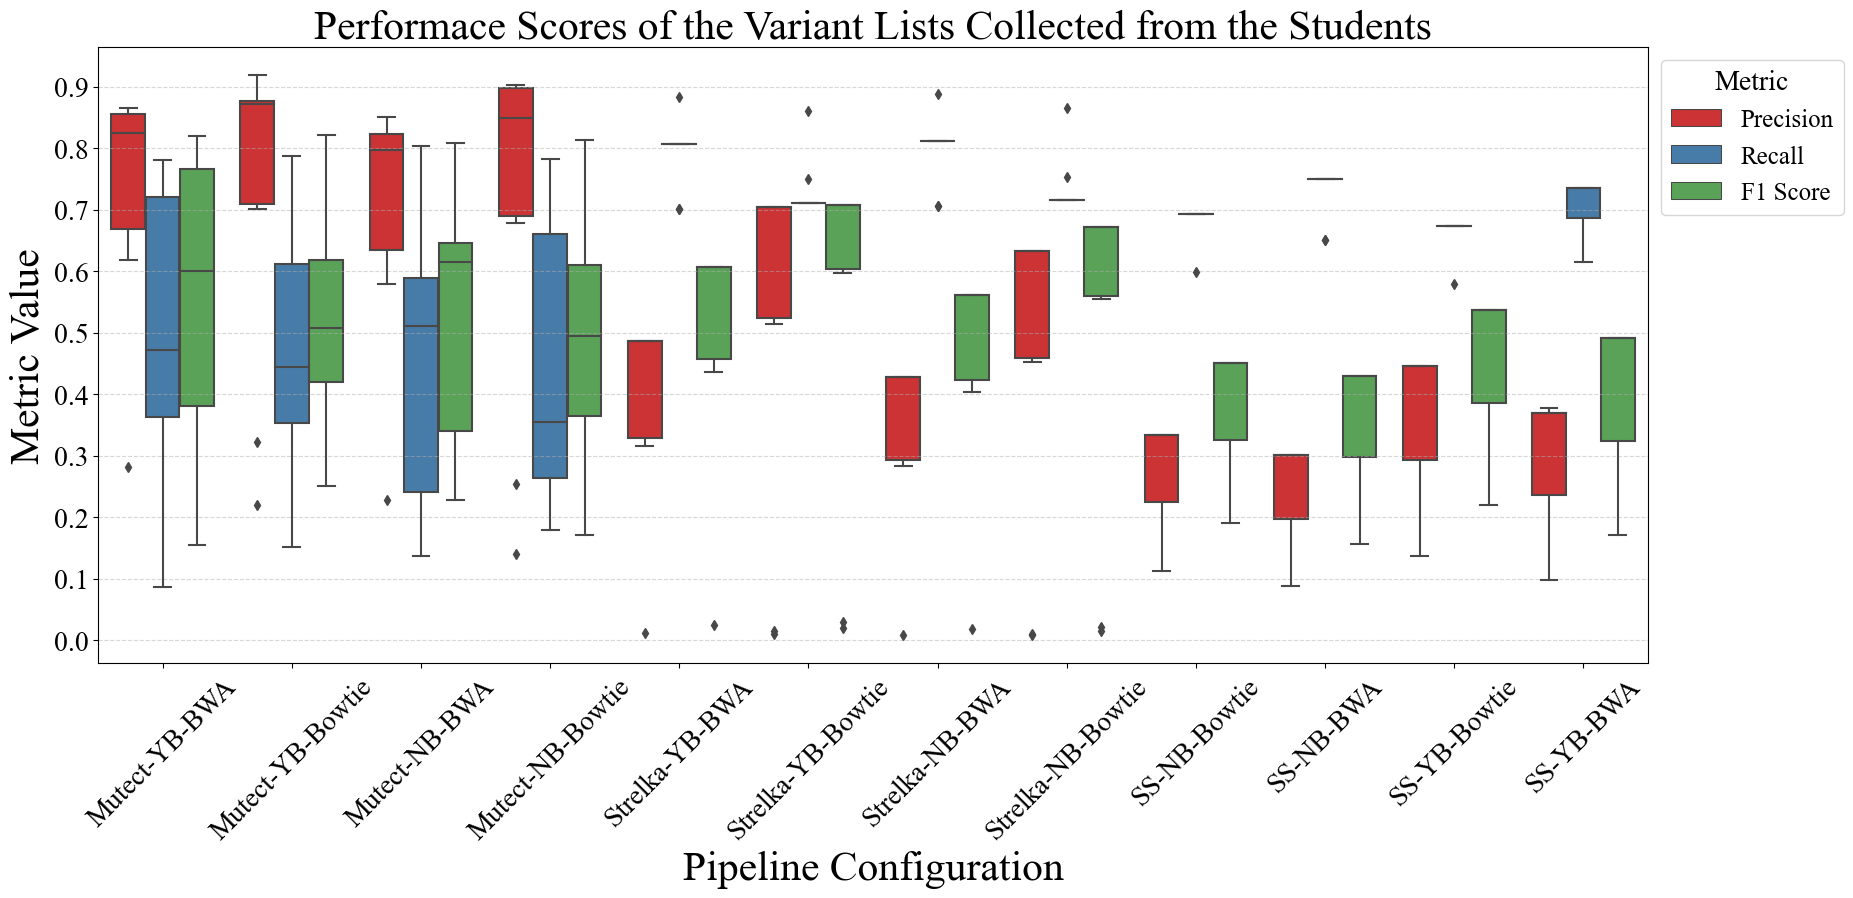

In [33]:
from matplotlib.ticker import MultipleLocator
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 30})

# Transform the data into a long format DataFrame suitable for seaborn's boxplot
records = []
for method, metrics in scores_per_pipeline.items():
    for metric, values in metrics.items():
        for value in values:
            records.append({'Method': method, 'Metric': metric, 'Value': value})


for entry in records:
    entry["Method"] = entry["Method"].replace("_", "-")
    entry["Method"] = entry["Method"].replace("bwa", "BWA")
    entry["Method"] = entry["Method"].replace("bowtie", "Bowtie")
    entry["Method"] = entry["Method"].replace("ss", "SS")
    entry["Method"] = entry["Method"].replace("mutect", "Mutect")
    entry["Method"] = entry["Method"].replace("strelka", "Strelka")
    entry["Method"] = entry["Method"].replace("yb", "YB")
    entry["Method"] = entry["Method"].replace("nb", "NB")


df = pd.DataFrame(records)

# Plotting
plt.figure(figsize=(20, 8))
plt.tight_layout()
ax = sns.boxplot(data=df, x='Method', y='Value', hue='Metric', palette='Set1', dodge=True)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
plt.title('Performace Scores of the Variant Lists Collected from the Students', fontsize=30)
plt.xlabel('Pipeline Configuration')
plt.ylabel('Metric Value')
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20) # Rotate method names for better readability
plt.legend(title='Metric', bbox_to_anchor=(1, 1), loc=2, fontsize=18, title_fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.savefig(os.path.join(DIRECTORY, "Figures", "metrics_per_pipeline.pdf"), bbox_inches='tight')
plt.show()

-----